In [1]:
!pip install tqdm
from PIL import Image
import os
import pandas as pd
import numpy as np
import sleap
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pickle

mpl.style.use("seaborn-deep")
sleap.versions()

SLEAP: 1.3.3
TensorFlow: 2.7.0
Numpy: 1.21.6
Python: 3.7.12
OS: Windows-10-10.0.19041-SP0


## Metrics for SLEAP Central

In [10]:
metrics = sleap.load_metrics(
    r"D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\test_cropping\sample\custom_labels_sample\models\241106_104724.single_instance.n=161",
    split="train",
)
print("\n".join(metrics.keys()))

vis.tp
vis.fp
vis.tn
vis.fn
vis.precision
vis.recall
dist.frame_idxs
dist.video_paths
dist.dists
dist.avg
dist.p50
dist.p75
dist.p90
dist.p95
dist.p99
pck.thresholds
pck.pcks
pck.mPCK_parts
pck.mPCK
oks.mOKS
oks_voc.match_score_thresholds
oks_voc.recall_thresholds
oks_voc.match_scores
oks_voc.precisions
oks_voc.recalls
oks_voc.AP
oks_voc.AR
oks_voc.mAP
oks_voc.mAR
pck_voc.match_score_thresholds
pck_voc.recall_thresholds
pck_voc.match_scores
pck_voc.precisions
pck_voc.recalls
pck_voc.AP
pck_voc.AR
pck_voc.mAP
pck_voc.mAR


In [11]:
print("Error distance (50%):", metrics["dist.p50"])
print("Error distance (90%):", metrics["dist.p90"])
print("Error distance (95%):", metrics["dist.p95"])

Error distance (50%): 1.3548369183825655
Error distance (90%): 2.7212994431936344
Error distance (95%): 3.334940294309843


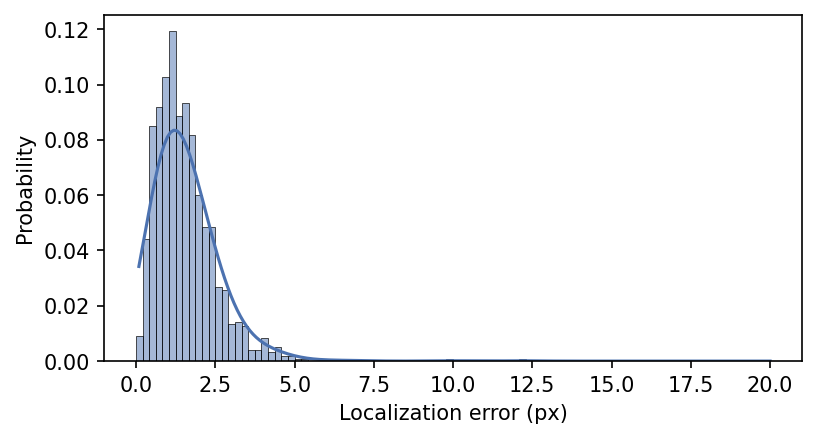

In [12]:
plt.figure(figsize=(6, 3), dpi=150, facecolor="w")
sns.histplot(
    metrics["dist.dists"].flatten(),
    binrange=(0, 20),
    kde=True,
    kde_kws={"clip": (0, 20)},
    stat="probability",
)
plt.xlabel("Localization error (px)");

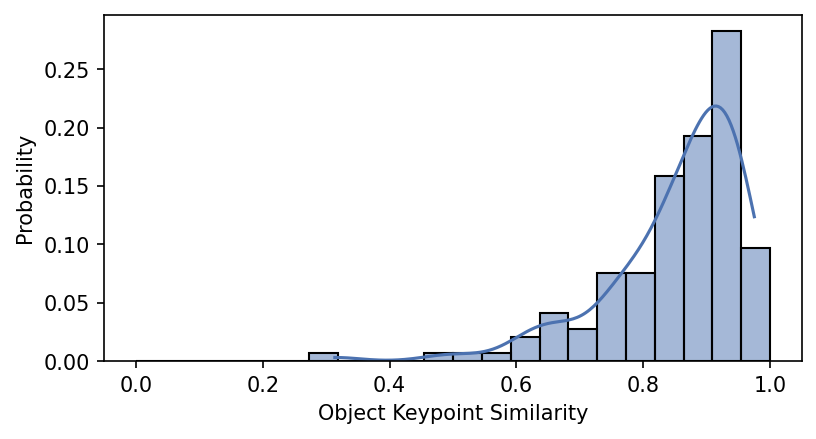

In [13]:
plt.figure(figsize=(6, 3), dpi=150, facecolor="w")
sns.histplot(
    metrics["oks_voc.match_scores"].flatten(),
    binrange=(0, 1),
    kde=True,
    kde_kws={"clip": (0, 1)},
    stat="probability",
)
plt.xlabel("Object Keypoint Similarity");

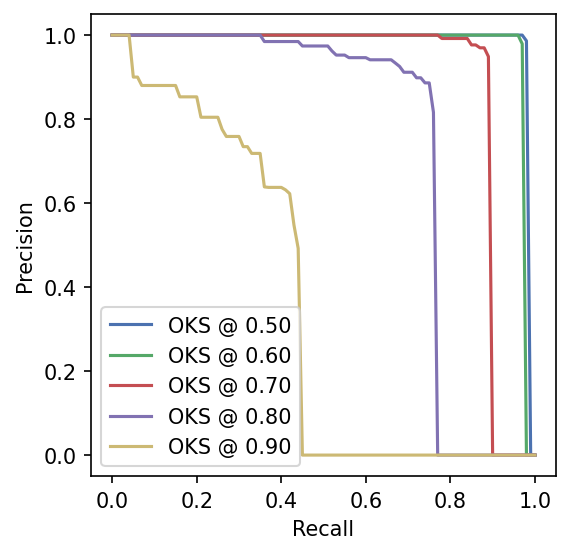

In [14]:
plt.figure(figsize=(4, 4), dpi=150, facecolor="w")
for precision, thresh in zip(
    metrics["oks_voc.precisions"][::2], metrics["oks_voc.match_score_thresholds"][::2]
):
    plt.plot(
        metrics["oks_voc.recall_thresholds"],
        precision,
        "-",
        label=f"OKS @ {thresh:.2f}",
    )
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left");

In [15]:
print("mAP:", metrics["oks_voc.mAP"])
print("mAR:", metrics["oks_voc.mAR"])

mAP: 0.728442195609821
mAR: 0.7586206896551724


In [5]:
h = sleap.load_file(
    r"D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\test_cropping\sample\multicam_video_2024-07-24T10_04_55_cropped_20241104101620\multicam_video_2024-07-24T10_04_55_cropped_20241104101620.slp"
)

In [6]:
frame_data = h[0]
for instance in frame_data.instances:
    points = instance.points_array
    print(instance)

PredictedInstance(video=Video(filename=D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\test_cropping\sample\multicam_video_2024-07-24T10_04_55_cropped_20241104101620\multicam_video_2024-07-24T10_04_55_central.avi.mp4, shape=(35966, 624, 608, 1), backend=MediaVideo), frame_idx=0, points=[nose: (325.9, 553.8, 0.66), Lear: (354.1, 533.9, 0.52), Rear: (354.2, 532.5, 0.20), LFlimb: (360.1, 554.0, 0.80), RFlimb: (359.9, 572.0, 0.73), Flimbmid: (362.2, 564.2, 0.94), LBlimb: (423.9, 552.1, 0.74), RBlimb: (405.9, 596.1, 0.91), Blimbmid: (414.0, 576.1, 0.92), tailbase: (444.2, 586.0, 0.65)], score=7.06, track=None, tracking_score=0.00)


In [21]:
points

rec.array([[325.85058594, 553.78625488],
           [354.08468628, 533.93554688],
           [354.23431396, 532.46899414],
           [360.10540771, 554.02410889],
           [359.91067505, 572.0269165 ],
           [362.2414856 , 564.17694092],
           [423.85690308, 552.12054443],
           [405.87088013, 596.06103516],
           [413.97125244, 576.1159668 ],
           [444.15872192, 586.02453613]],
          dtype=float64)

##  Create array of tracked points for sample video

In [9]:
from pathlib import Path

home = Path(
    r"D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\test_cropping\sample\multicam_video_2024-07-24T10_04_55_cropped_20241104101620"
)

We check that in the directory we have predictions for each point of view

In [10]:
file_path = [rf"{file.absolute()}" for file in home.iterdir() if file.suffix == ".slp"]

In [11]:
file_path

['D:\\P05_3DRIG_YE-LP\\e01_mouse_hunting\\v04_mice-hunting\\test_cropping\\sample\\multicam_video_2024-07-24T10_04_55_cropped_20241104101620\\multicam_video_2024-07-24T10_04_55_cropped_20241104101620.slp',
 'D:\\P05_3DRIG_YE-LP\\e01_mouse_hunting\\v04_mice-hunting\\test_cropping\\sample\\multicam_video_2024-07-24T10_04_55_cropped_20241104101620\\multicam_video_2024-07-24T10_04_55_mirror-bottom.avi.mp4.slp',
 'D:\\P05_3DRIG_YE-LP\\e01_mouse_hunting\\v04_mice-hunting\\test_cropping\\sample\\multicam_video_2024-07-24T10_04_55_cropped_20241104101620\\multicam_video_2024-07-24T10_04_55_mirror-left.avi.mp4.slp',
 'D:\\P05_3DRIG_YE-LP\\e01_mouse_hunting\\v04_mice-hunting\\test_cropping\\sample\\multicam_video_2024-07-24T10_04_55_cropped_20241104101620\\multicam_video_2024-07-24T10_04_55_mirror-right.avi.mp4.slp',
 'D:\\P05_3DRIG_YE-LP\\e01_mouse_hunting\\v04_mice-hunting\\test_cropping\\sample\\multicam_video_2024-07-24T10_04_55_cropped_20241104101620\\multicam_video_2024-07-24T10_04_55_mirro

In [12]:
# check the length of the labels for each recording
for paht in file_path:
    labels = sleap.load_file(paht)
    print(len(labels))

35966
35966
35966
35966
35966


In [6]:
# check nodes for each point of view and we save only uniques points in final_nodes
complete_nodes = []

for path in file_path:

    labels = sleap.load_file(path)
    complete_nodes.append([node.name for node in labels.skeleton.nodes])

final_nodes = []

for node in complete_nodes:
    for point in node:
        if str(point).lower() not in final_nodes:
            final_nodes.append(str(point).lower())
print(final_nodes)

['nose', 'lear', 'rear', 'lflimb', 'rflimb', 'flimbmid', 'lblimb', 'rblimb', 'blimbmid', 'tailbase', 'upperforward', 'uppermid', 'upperback']


In [7]:
# Get final array for triangulation: shape (n_camera, n_frames, n_nodes, 2)

data = []

for path in file_path:  # iterate over all the recordings

    labels = sleap.load_file(path)
    complete_nodes = [
        node.name for node in labels.skeleton.nodes
    ]  # get nodes for that recording
    camera_names = [str(node).lower() for node in complete_nodes]  # nodes in lower case
    frame_points = []  # predicted points for each frame (shape: n_frames, n_nodes, 2)
    for frame in labels:
        if frame.instances:

            for instance in frame.instances:
                camera_data = instance.points_array
                output = np.full(
                    (len(final_nodes), 2), np.nan
                )  # initialise the array with n_nodes as the unique nodes
                for i, point in enumerate(
                    final_nodes
                ):  # subsitute the predicted points in the right position
                    if point in camera_names:
                        p_index = camera_names.index(point)
                        output[i] = camera_data[p_index]
                frame_points.append(output)
        else:
            output = np.full(
                (len(final_nodes), 2), np.nan
            )  # if frame is empty, fill with nan
            frame_points.append(output)
    frame_points = np.stack(frame_points)
    data.append(frame_points)
data_array = np.stack(data)
print(data_array.shape)

(5, 35966, 13, 2)


In [144]:
with open("tracked_points_sample.pkl", "wb") as f:
    pickle.dump(data_array, f)

## Filter DLC dataset

In [2]:
input_dir = r"D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\test_cropping\dlc_test\training-datasets\iteration-0\UnaugmentedDataSet_central_view_modelMay8"

In [9]:
correct_size = (600, 620)

In [10]:
incorrect_files_count = 0
incorrect_images = []

for filename in os.listdir(input_dir):
    if filename.endswith(".png"):
        img = Image.open(os.path.join(input_dir, filename))
        if img.size != correct_size:
            incorrect_files_count += 1
            incorrect_images.append(filename)

In [11]:
if incorrect_files_count > 0:
    print(f"Found {incorrect_files_count} images with incorrect size:")

Found 200 images with incorrect size:


In [15]:
incorrect_images[:2]

['img000715.png', 'img000715_bodypart.png']

In [13]:
labels = pd.read_csv(os.path.join(input_dir, "CollectedData_rorsharck.csv"))

In [14]:
labels.head()

,scorer,Unnamed: 1,Unnamed: 2,rorsharck,rorsharck.1,rorsharck.2,rorsharck.3,rorsharck.4,rorsharck.5,rorsharck.6,...,rorsharck.10,rorsharck.11,rorsharck.12,rorsharck.13,rorsharck.14,rorsharck.15,rorsharck.16,rorsharck.17,rorsharck.18,rorsharck.19
0,bodyparts,NaN,NaN,nose,nose,Lear,Lear,Rear,Rear,LFlimb,...,Flimbmid,Flimbmid,LBlimb,LBlimb,RBlimb,RBlimb,Blimbmid,Blimbmid,tailbase,tailbase
1,coords,NaN,NaN,x,y,x,y,x,y,x,...,x,y,x,y,x,y,x,y,x,y
2,labeled-data,Basler_acA1440-220um__40075240__20240416_10040...,img01230.png,474.9347070877619,568.341633180536,480.8216576336422,519.7197823756733,NaN,NaN,480.38558722283625,...,496.5201924226561,561.5825418130438,486.70860817952246,538.0347396295228,536.638670216803,562.4546826346557,526.1729803574603,531.2756482620307,545.5781136383249,511.43444457036026
3,labeled-data,Basler_acA1440-220um__40075240__20240416_10040...,img01230.png,474.9347070877619,568.341633180536,480.8216576336422,519.7197823756733,NaN,NaN,480.38558722283625,...,496.5201924226561,561.5825418130438,486.70860817952246,538.0347396295228,536.638670216803,562.4546826346557,526.1729803574603,531.2756482620307,545.5781136383249,511.43444457036026
4,labeled-data,Basler_acA1440-220um__40075240__20240416_10040...,img09193.png,418.63414588401906,506.2004001506785,NaN,NaN,NaN,NaN,428.14444629079213,...,437.3264688423362,532.9958064496489,474.6284354579839,538.591101441996,436.6091233304968,554.3727027024623,460.9988707330357,554.5161718048303,474.6284354579839,585.5054979162915


In [17]:
df_filtered = labels[~labels["Unnamed: 2"].isin(incorrect_images)]

In [25]:
df_filtered = df_filtered.reset_index(drop=True)

In [38]:
df_filtered.to_csv(
    os.path.join(input_dir, "CollectedData_rorsharck_filtered.csv"), index=False
)

In [28]:
df_filtered.dtypes

scorer          object
Unnamed: 1      object
Unnamed: 2      object
rorsharck       object
rorsharck.1     object
rorsharck.2     object
rorsharck.3     object
rorsharck.4     object
rorsharck.5     object
rorsharck.6     object
rorsharck.7     object
rorsharck.8     object
rorsharck.9     object
rorsharck.10    object
rorsharck.11    object
rorsharck.12    object
rorsharck.13    object
rorsharck.14    object
rorsharck.15    object
rorsharck.16    object
rorsharck.17    object
rorsharck.18    object
rorsharck.19    object
dtype: object

In [29]:
labels.dtypes

scorer          object
Unnamed: 1      object
Unnamed: 2      object
rorsharck       object
rorsharck.1     object
rorsharck.2     object
rorsharck.3     object
rorsharck.4     object
rorsharck.5     object
rorsharck.6     object
rorsharck.7     object
rorsharck.8     object
rorsharck.9     object
rorsharck.10    object
rorsharck.11    object
rorsharck.12    object
rorsharck.13    object
rorsharck.14    object
rorsharck.15    object
rorsharck.16    object
rorsharck.17    object
rorsharck.18    object
rorsharck.19    object
dtype: object

In [33]:
print(df_filtered["Unnamed: 2"].unique())

['nan' 'img01230.png' 'img09193.png' 'img12346.png' 'img12924.png'
 'img13594.png' 'img16314.png' 'img18570.png' 'img20074.png'
 'img21011.png' 'img22826.png' 'img25013.png' 'img25244.png'
 'img29103.png' 'img30541.png' 'img33432.png' 'img34728.png'
 'img35083.png' 'img38597.png' 'img44850.png' 'img45834.png'
 'img04749.png' 'img19402.png' 'img21161.png' 'img21940.png'
 'img28055.png' 'img30338.png' 'img32470.png' 'img36958.png'
 'img42034.png' 'img48795.png' 'img50940.png' 'img57117.png'
 'img65630.png' 'img68705.png' 'img77632.png' 'img81953.png'
 'img86324.png' 'img88337.png' 'img96431.png' 'img96819.png'
 'img001612.png' 'img003046.png' 'img006320.png' 'img020536.png'
 'img025829.png' 'img027140.png' 'img047718.png' 'img054343.png'
 'img062539.png' 'img071045.png' 'img079538.png' 'img080997.png'
 'img086848.png' 'img092983.png' 'img098606.png' 'img106328.png'
 'img112220.png' 'img121939.png' 'img123305.png' 'img137161.png'
 'img017959.png' 'img018918.png' 'img030787.png' 'img040210

In [34]:
df = df_filtered[
    df_filtered["Unnamed: 2"].apply(lambda x: isinstance(x, str) and x.endswith(".png"))
]